## Reproduce results in Figure 4

Related dataset: 
- [Xenium breast cancer Replicate 1 and 2](https://www.10xgenomics.com/cn/datasets/preview-data-ffpe-human-lung-cancer-with-xenium-multimodal-cell-segmentation-1-standard)

Reference can be download [here](11)

All the datasets are training with epoch settings: `epochs = 200` `seg_training_epochs = 10` `deconv_warmup_epochs = 100`

All the data for reproducing the result can be downloaded [here](temp_link)

### CellART annotation on two replicates

In [30]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import tifffile
import spatialdata_plot

In [2]:
celltype_mapping = {
    'B Cells': '#1E77B4',
    'DCs': '#E477C1',
    'Endothelial': '#289E68',
    'Macrophages': '#D62728',
    'Malignant': '#FF7F0D',
    'Mast Cells': '#8C564B',
    'Myoepithelial': '#AA41FC',
    'Perivascular-Like': '#B6BD61',
    'Stromal': '#15BECF',
    'T Cells': '#AFC7E8',
}

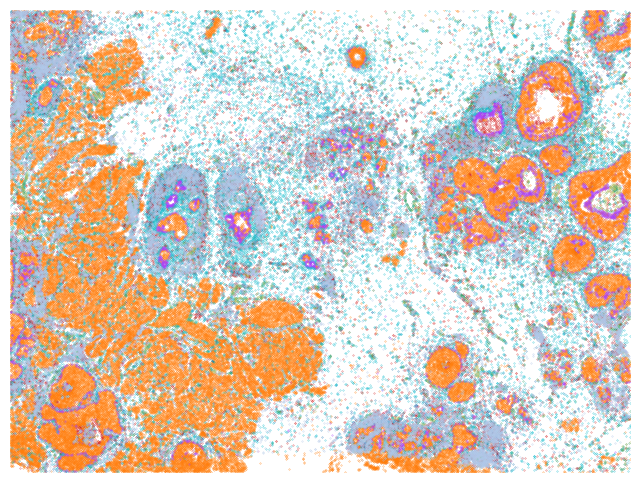

In [17]:
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D

annotated_svt = sc.read_h5ad("/home/share/yhchen/niche/adata_breast_cancer_rep1.h5ad")

df = annotated_svt.obs

fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

from matplotlib.patches import Rectangle



celltype_names = list(celltype_mapping.keys())
selected_celltype = celltype_names
for i in range(len(celltype_names)):
    if celltype_names[i] not in selected_celltype:
        continue
    sub_df = df[df["celltype"] == celltype_names[i]]
    ax1.scatter(sub_df["y"], sub_df["x"], s=0.05, label=celltype_names[i], color=celltype_mapping[celltype_names[i]])
# ax1.invert_yaxis()
ax1.axis("off")
ax1.set_xlim(df["y"].min(), df["y"].max())
ax1.set_ylim(df["x"].max(), df["x"].min())
ax1.invert_yaxis()

plt.show()

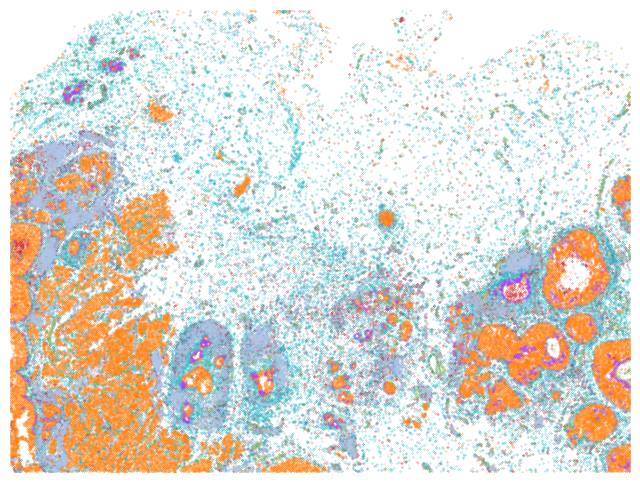

In [16]:
annotated_svt = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/XeniumBreastCancer_Rep2/epoch_200/cell_deconv.h5ad")

df = annotated_svt.obs

fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))


celltype_names = list(celltype_mapping.keys())
selected_celltype = celltype_names
for i in range(len(celltype_names)):
    if celltype_names[i] not in selected_celltype:
        continue
    sub_df = df[df["celltype"] == celltype_names[i]]
    ax1.scatter(sub_df["y"], sub_df["x"], s=0.05, label=celltype_names[i], color=celltype_mapping[celltype_names[i]])
ax1.axis("off")
ax1.set_xlim(df["y"].min(), df["y"].max())
ax1.set_ylim(df["x"].max(), df["x"].min())
ax1.invert_yaxis()

plt.show()

### Segmentation and annotation comparison

In [18]:
from spatialdata_io import xenium

sdata = xenium(
    path="/import/home2/yhchenmath/Dataset/CellSeg/TestSeg/Xenium-BreastCancer1/outs/")

INFO     reading /import/home2/yhchenmath/Dataset/CellSeg/TestSeg/Xenium-BreastCancer1/outs/cell_feature_matrix.h5 


/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/tmp/ipykernel_993120/540348584.py:3: DeprecationWarning: The default value of `cells_as_circles` will change to `False` in the next release. Please pass `True` explicitly to maintain the current behavior.
  sdata = xenium(


INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           


In [53]:
method_colors = {
    "SVT": "#B07AA1",       
    "BIDCell": "#568F18",   
    "10X": "#7EA5C8",       
    "Baysor": "#F4B860",    
    "Cellpose": "#CABFAB"   
}

celltype_mapping = {
    'B Cells': '#1E77B4',
    'DCs': '#E477C1',
    'Endothelial': '#289E68',
    'Macrophages': '#D62728',
    'Malignant': '#FF7F0D',
    'Mast Cells': '#8C564B',
    'Myoepithelial': '#AA41FC',
    'Perivascular-Like': '#B6BD61',
    'Stromal': '#15BECF',
    'T Cells': '#AFC7E8',
}


svt_mask = np.load("/import/home2/yhchenmath/Code/Triplet/LOG/XeniumBreastCancer_Annotation_with_feature/new_segmentation_mask.npy").astype("int32")
svt_nuclei = np.load("/import/home2/yhchenmath/Code/Triplet/Data/XeniumBreastCancer/segmentation_mask.npy") # U
bidcell_mask = tifffile.imread("/import/home2/yhchenmath/Log/CellSeg/BIDCell_breast_cancer/standard_result/epoch_1_step_4000_connected.tif")
xenium_mask = tifffile.imread("/import/home2/yhchenmath/Log/CellSeg/result_collection/xenium_breast_cancer/10X_cell_mask.tif")
baysor_mask = tifffile.imread("/import/home3/yhchenmath/baysor_out/xenium_breast_cancer/baysor_segmentation_mask.tif")
cellpose_mask = tifffile.imread("/import/home2/yhchenmath/Dataset/CellSeg/TestSeg/preprocessed/nuclei.tif")

annotated_svt = sc.read_h5ad("/home/share/yhchen/niche/adata_breast_cancer_rep1.h5ad")

annotated_10X_scvi = sc.read_h5ad("/import/home2/yhchenmath/Code/TripletBenchmarking/figure_2/breast_cancer_cells/annotating_cells/10X_scvi.h5ad")
annotated_10X_scvi.obs["celltype"] = annotated_10X_scvi.obs["C_scANVI"]
annotated_10X_scvi.obs["center_x"] = annotated_10X_scvi.obsm["spatial"][:, 0]
annotated_10X_scvi.obs["center_y"] = annotated_10X_scvi.obsm["spatial"][:, 1]

annotated_10X_tangram = sc.read_h5ad("/import/home2/yhchenmath/Code/TripletBenchmarking/figure_2/breast_cancer_cells/annotating_cells/10X_tangram.h5ad")
annotated_10X_tangram.obs["celltype"] = annotated_10X_tangram.obsm["tangram_ct_pred"].idxmax(axis=1)
annotated_10X_tangram.obs["celltype"] = annotated_10X_tangram.obs["celltype"].astype("category")
annotated_10X_tangram = annotated_10X_tangram[:, 1:]
annotated_10X_tangram.obs_names = annotated_10X_scvi.obs_names

annotated_10X_rctd = sc.read_h5ad("/import/home2/yhchenmath/Code/TripletBenchmarking/figure_2/breast_cancer_cells/annotating_cells/10X_rctd.h5ad")

In [ ]:
nuclei_svt = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/XeniumBreastCancer_Annotation_with_feature/epoch_100/cell_deconv.h5ad")

In [ ]:
from cellart.utils.spatialdata_utils import append_xenium_boundary

In [24]:
append_xenium_boundary(svt_mask, sdata, "svt_boundaries", celltype = annotated_svt.obs["celltype"])
append_xenium_boundary(svt_nuclei, sdata, "svt_nuclei")
append_xenium_boundary(bidcell_mask, sdata, "bidcell_boundaries")
append_xenium_boundary(xenium_mask, sdata, "10X_boundaries")
append_xenium_boundary(baysor_mask, sdata, "baysor_boundaries")
append_xenium_boundary(cellpose_mask, sdata, "cellpose_boundaries")

append_xenium_boundary(xenium_mask, sdata, "10X_tangram", celltype = annotated_10X_tangram.obs["celltype"])
append_xenium_boundary(xenium_mask, sdata, "10X_scvi", celltype = annotated_10X_scvi.obs["celltype"])
append_xenium_boundary(xenium_mask, sdata, "10X_rctd", celltype = annotated_10X_rctd.obs["celltype"])

/tmp/ipykernel_993120/2510591147.py:92: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_df = sdata.shapes[append_name].centroid
/tmp/ipykernel_993120/2510591147.py:92: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_df = sdata.shapes[append_name].centroid
/tmp/ipykernel_993120/2510591147.py:92: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_df = sdata.shapes[append_name].centroid
/tmp/ipykernel_993120/2510591147.py:92: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometr

In [25]:
import spatialdata as sd

seg_transformation = sd.transformations.get_transformation(sdata.shapes["nucleus_boundaries"])
translation = sd.transformations.Translation([6, 6.5], axes=("x", "y"))
sequence = sd.transformations.Sequence([translation, seg_transformation])
sd.transformations.set_transformation(sdata.shapes["cellpose_boundaries"], sequence, to_coordinate_system="global")
sd.transformations.set_transformation(sdata.shapes["svt_boundaries"], sequence, to_coordinate_system="global")
sd.transformations.set_transformation(sdata.shapes["svt_nuclei"], sequence, to_coordinate_system="global")
sd.transformations.set_transformation(sdata.shapes["bidcell_boundaries"], sequence, to_coordinate_system="global")
sd.transformations.set_transformation(sdata.shapes["baysor_boundaries"], sequence, to_coordinate_system="global")
sd.transformations.set_transformation(sdata.shapes["10X_tangram"], sequence, to_coordinate_system="global")
sd.transformations.set_transformation(sdata.shapes["10X_scvi"], sequence, to_coordinate_system="global")
sd.transformations.set_transformation(sdata.shapes["10X_rctd"], sequence, to_coordinate_system="global")

In [26]:
x_min, x_max, y_min, y_max = 12875, 13075, 26100, 26300
sdata_roi_1 = sdata.query.bounding_box(
    min_coordinate=[x_min, y_min], max_coordinate=[x_max, y_max], axes=("y", "x"), target_coordinate_system="global"
)

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [33]:
def plot_seg(sdata, img_key, shape_key, label, ax, color, channel = None):
    tmp = sdata.pl.render_images(img_key, channel=channel)
    tmp = tmp.pl.render_shapes(
            shape_key, 
            color=color,
            fill_alpha=0.4,
            outline_color=color,
            outline_alpha=1,
            outline_width=2,
        ).pl.show(title='', frameon=False, legend_loc='none', ax=ax, return_ax=True, colorbar=False)
    ax.axis('off')

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


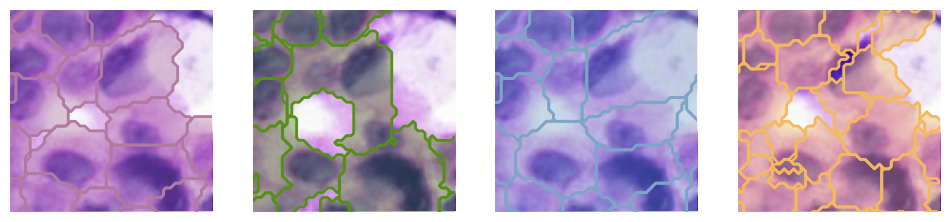

In [34]:
fig, ax = plt.subplots(1, 4, figsize=(12,3))
plot_seg(sdata_roi_1, "he_image", "svt_boundaries", "SVT", ax[0], method_colors["CellART"])
plot_seg(sdata_roi_1, "he_image", "bidcell_boundaries", "BIDCell", ax[1], method_colors["BIDCell"])
plot_seg(sdata_roi_1, "he_image", "10X_scvi", "10X", ax[2], method_colors["10X"])
plot_seg(sdata_roi_1, "he_image", "baysor_boundaries", "Baysor", ax[3], method_colors["Baysor"])

for i in range(4):
    ax[i].set_xlim(y_min, y_max)
    ax[i].set_ylim(x_min, x_max)

In [35]:
x_min, x_max, y_min, y_max = 16750, 19750, 17750, 20750
sdata_roi_2 = sdata.query.bounding_box(
    #  3500, 4200, 3700, 4500
    min_coordinate=[16750, 17750], max_coordinate=[19750, 20750], axes=("y", "x"), target_coordinate_system="global"
)

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [36]:
for k in ["svt_boundaries", "10X_tangram", "10X_scvi", "10X_rctd"]:
    ct_col = sdata_roi_2.shapes[k].celltype
    cts = sdata_roi_2.shapes[k].celltype.unique()
    for ct in cts:
        sdata_roi_2.shapes[f"{k}_{ct.replace(' ', '_').replace('(', '').replace(')', '')}"] = \
        sdata_roi_2.shapes[k][ct_col == ct]

In [38]:
def plot_annotation(sdata, shape_key, ax, title):
    tmp = sdata.pl.render_images("he_image")
    draw_cts = sdata.shapes[shape_key].celltype.unique().tolist()
    for ct in draw_cts:
        color = celltype_mapping[ct]
        tmp = tmp.pl.render_shapes(
            f"{shape_key}_{ct.replace(' ', '_').replace('(', '').replace(')', '')}",
            color=color, fill_alpha=0.45, outline_width=0.3, outline_alpha=1, outline_color = color
        )
    tmp.pl.show(coordinate_systems="global", ax=ax, title="", frameon=False, legend_loc='none')
    ax.axis('off')
    # ms = 20
    # legend_elements = [Line2D([0], [0], marker= None, color='w', label=title, linewidth=0,
    #                           markeredgecolor="#FFFFFF", markerfacecolor="#FFFFFF", markersize=ms)]
    # ax.legend(handles=legend_elements, bbox_to_anchor=(0.45,-0.13), loc='lower center', ncol=2, handletextpad=0., prop={'size': 20, 'style': 'italic'}, frameon=False)

In [39]:
# plt.style.use('default')
fig, ax = plt.subplots(1, 4, figsize=(16,4))

plot_annotation(sdata_roi_2, "svt_boundaries", ax[1], "SVT (Corr 0.81)")
plot_annotation(sdata_roi_2, "10X_tangram", ax[2], "Xenium 1.0 + Tangram (Corr 0.77)")
plot_annotation(sdata_roi_2, "10X_scvi", ax[3], "Xenium 1.0 + scVI (Corr 0.73)")

g = "CDH1"
sdata_roi_2.shapes["svt_boundaries"][g] = annotated_svt[list(sdata_roi_2.shapes["svt_boundaries"].index.astype(str))].X[:, annotated_svt.var_names.get_loc(g)].toarray()
sdata_roi_2.pl.render_images(
     "he_image").pl.render_shapes(
        f"svt_boundaries",
        color=g, fill_alpha=0.8, outline_width=0.3, outline_alpha=1, outline_color = "w", cmap='Oranges'
    ).pl.show(coordinate_systems="global", ax=ax[0], title="", frameon=False, legend_loc='none', colorbar=False)
ax[0].axis('off')

for i in range(4):
    ax[i].set_xlim(y_min, y_max)
    ax[i].set_ylim(x_min, x_max)

# plt.tight_layout()

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

def plot_bar(df, x_col, y_col, hue, y_label, ax, method_colors, error_bar=False):
    # Plot
    if error_bar:
        sns.barplot(
            data=df,
            x=x_col,
            y=y_col,
            hue=hue,
            estimator=np.median,
            errorbar=('pi', 10),
            capsize=0.1,
            palette=method_colors,
            ax=ax,
            err_kws={"linewidth": 1}
        )
    else:
        sns.barplot(
            data=df,
            x=x_col,
            y=y_col,
            hue=hue,
            capsize=0.1,
            palette=method_colors,
            ax=ax,
            err_kws={"linewidth": 1}
        )

    # Axis labels and limits
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel('')
    # ax.set(ylim=(0.18, 0.22))

    # Rotate x-tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Remove grid
    ax.grid(False)

    # Customize spines (axis lines)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Add small outward ticks
    ax.tick_params(
        axis='both',
        which='major',
        direction='out',
        length=4,
        width=1,
        color='black',
        bottom=True, top=False, left=True, right=False
    )

In [42]:
import anndata as ad

adata_sc = sc.read_h5ad("/home/share/yhchen/data_st/breast_cancer/filtered_sc.h5ad")
adata_sc.obs['celltype'] = adata_sc.obs['celltype'].replace({"Invasive Tumor": "Malignant", "DCIS 2": "Malignant", "Prolif Invasive Tumor": "Malignant", "DCIS 1": "Malignant", "CD4+ T Cells": "T Cells", "CD8+ T Cells": "T Cells", "Macrophages 1": "Macrophages", "Macrophages 2": "Macrophages", "Myoepi ACTA2+": "Myoepithelial", "Myoepi KRT15+": "Myoepithelial", "IRF7+ DCs": "DCs", "LAMP3+ DCs": "DCs"})

def find_markers(
    adata: ad.AnnData,
    cell_type_column: str,
    pos_percentile: float = 5,
    neg_percentile: float = 10,
    percentage: float = 50,
):
    """
    Identify positive and negative markers for each cell type based on gene expression.

    Parameters:
    ----------
    adata : AnnData
        Annotated data object containing gene expression data.
    cell_type_column : str
        Column name in `adata.obs` specifying cell types.
    pos_percentile : float, default=5
        Top x% of highly expressed genes to consider as markers.
    neg_percentile : float, default=10
        Bottom x% of lowly expressed genes to consider.
    percentage : float, default=50
        Minimum percentage of cells within a type that must express a marker.

    Returns:
    -------
    Dict[str, Dict[str, List[str]]]
        Dictionary mapping cell types to lists of positive and negative marker genes.
    """
    markers = {}
    adata.raw = adata  # Ensure raw expression values are used
    adata.var_names_make_unique()
    
    sc.tl.rank_genes_groups(adata, groupby=cell_type_column)
    
    genes = adata.var_names
    for cell_type in adata.obs[cell_type_column].unique():
        subset = adata[adata.obs[cell_type_column] == cell_type]
        mean_expression = np.asarray(subset.X.mean(axis=0)).flatten()

        # Compute percentile cutoffs
        cutoff_high = np.percentile(mean_expression, 100 - pos_percentile)
        cutoff_low = np.percentile(mean_expression, neg_percentile)

        pos_indices = np.where(mean_expression >= cutoff_high)[0]
        neg_indices = np.where(mean_expression <= cutoff_low)[0]

        # Filter positive markers based on expression percentage
        expr_frac = np.asarray((subset.X[:, pos_indices] > 0).mean(axis=0)).flatten()
        valid_pos_indices = pos_indices[expr_frac >= (percentage / 100)]

        markers[cell_type] = {
            "positive": genes[valid_pos_indices].tolist(),
            "negative": genes[neg_indices].tolist(),
        }

    return markers

purified_markers = find_markers(adata_sc, "celltype", neg_percentile=10, percentage=50, pos_percentile=90)

def calculate_sensitivity(
    adata: ad.AnnData, purified_markers, max_cells_per_type: int = 1000
):
    """
    Calculate sensitivity of purified markers for each cell type.

    Parameters:
    ----------
    adata : AnnData
        Annotated data object containing gene expression data.
    purified_markers : Dict[str, Dict[str, List[str]]]
        Dictionary mapping cell types to positive and negative markers.
    max_cells_per_type : int, default=1000
        Maximum number of cells to consider per cell type.

    Returns:
    -------
    Dict[str, List[float]]
        Sensitivity values for each cell type.
    """
    sensitivity_results = {cell_type: [] for cell_type in purified_markers.keys()}

    for cell_type, markers in purified_markers.items():
        positive_markers = markers["positive"]
        subset = adata[adata.obs["celltype"] == cell_type]

        if subset.n_obs > max_cells_per_type:
            cell_indices = np.random.choice(subset.n_obs, max_cells_per_type, replace=False)
            subset = subset[cell_indices]

        for cell_counts in subset.X:
            positive_indices = subset.var_names.get_indexer(positive_markers)
            total_counts = cell_counts.sum()
            positive_counts = cell_counts[positive_indices].sum() if positive_markers else 0
            
            sensitivity = positive_counts / total_counts if total_counts > 0 else 0
            sensitivity_results[cell_type].append(sensitivity)

    return sensitivity_results


# Annotation
adata_st_ecc_dict = {}

adata_st_ecc_dict["SVT"] = annotated_svt.copy()
adata_st_ecc_dict["10X"] = ad.read_h5ad("/import/home2/yhchenmath/Code/ucs/paper_data/downstream_xenium_breast_cancer/scVI_output/Cell_10X/annotated_adata_st_with_ecc.h5ad")
adata_st_ecc_dict["BIDCell"] = ad.read_h5ad("/import/home2/yhchenmath/Code/ucs/paper_data/downstream_xenium_breast_cancer/scVI_output/BIDCell/annotated_adata_st_with_ecc.h5ad")
adata_st_ecc_dict["Baysor"] = ad.read_h5ad("/import/home2/yhchenmath/Code/ucs/paper_data/downstream_xenium_breast_cancer/scVI_output/Baysor/annotated_adata_st_with_ecc.h5ad")

adata_st_ecc_dict["10X"].obs['celltype'] = adata_st_ecc_dict["10X"].obs["C_scANVI"].replace({"Invasive Tumor": "Malignant", "DCIS 2": "Malignant", "Prolif Invasive Tumor": "Malignant", "DCIS 1": "Malignant", "CD4+ T Cells": "T Cells", "CD8+ T Cells": "T Cells", "Macrophages 1": "Macrophages", "Macrophages 2": "Macrophages", "Myoepi ACTA2+": "Myoepithelial", "Myoepi KRT15+": "Myoepithelial", "IRF7+ DCs": "DCs", "LAMP3+ DCs": "DCs"})
adata_st_ecc_dict["BIDCell"].obs['celltype'] = adata_st_ecc_dict["BIDCell"].obs["C_scANVI"].replace({"Invasive Tumor": "Malignant", "DCIS 2": "Malignant", "Prolif Invasive Tumor": "Malignant", "DCIS 1": "Malignant", "CD4+ T Cells": "T Cells", "CD8+ T Cells": "T Cells", "Macrophages 1": "Macrophages", "Macrophages 2": "Macrophages", "Myoepi ACTA2+": "Myoepithelial", "Myoepi KRT15+": "Myoepithelial", "IRF7+ DCs": "DCs", "LAMP3+ DCs": "DCs"})
adata_st_ecc_dict["Baysor"].obs['celltype'] = adata_st_ecc_dict["Baysor"].obs["C_scANVI"].replace({"Invasive Tumor": "Malignant", "DCIS 2": "Malignant", "Prolif Invasive Tumor": "Malignant", "DCIS 1": "Malignant", "CD4+ T Cells": "T Cells", "CD8+ T Cells": "T Cells", "Macrophages 1": "Macrophages", "Macrophages 2": "Macrophages", "Myoepi ACTA2+": "Myoepithelial", "Myoepi KRT15+": "Myoepithelial", "IRF7+ DCs": "DCs", "LAMP3+ DCs": "DCs"})



for method, adata in adata_st_ecc_dict.items():
    # If sparse matrix, convert to dense
    if hasattr(adata.X, "todense"):
        adata.X = adata.X.toarray()

sensitivity_results_per_method = {}
for method, adata in adata_st_ecc_dict.items():
    sensitivity_results = calculate_sensitivity(adata, purified_markers, max_cells_per_type=2000)
    sensitivity_results_per_method[method] = sensitivity_results

# Prepare data for sensitivity boxplots
sensitivity_boxplot_data = []
for method, sensitivity_results in sensitivity_results_per_method.items():
    for cell_type, sensitivities in sensitivity_results.items():
        method_df = pd.DataFrame({"Cell Type": cell_type, "Sensitivity": sensitivities, "Segmentation Method": method})
        sensitivity_boxplot_data.append(method_df)

# Concatenate all sensitivity dataframes into one
sensitivity_boxplot_data = pd.concat(sensitivity_boxplot_data)

/tmp/ipykernel_993120/993603261.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_sc.obs['celltype'] = adata_sc.obs['celltype'].replace({"Invasive Tumor": "Malignant", "DCIS 2": "Malignant", "Prolif Invasive Tumor": "Malignant", "DCIS 1": "Malignant", "CD4+ T Cells": "T Cells", "CD8+ T Cells": "T Cells", "Macrophages 1": "Macrophages", "Macrophages 2": "Macrophages", "Myoepi ACTA2+": "Myoepithelial", "Myoepi KRT15+": "Myoepithelial", "IRF7+ DCs": "DCs", "LAMP3+ DCs": "DCs"})
/tmp/ipykernel_993120/993603261.py:114: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead

In [ ]:
# sensitivity_boxplot_data = pd.read_csv("/import/home2/yhchenmath/Code/Triplet/LOG/XeniumBreastCancer_Annotation_with_feature/epoch_200/sensitivity_boxplot_data.csv")
sensitivity_boxplot_data["Segmentation Method"].value_counts()

Segmentation Method
10X        18484
BIDCell    17822
Baysor     17714
SVT        17560
Name: count, dtype: int64

/tmp/ipykernel_993120/2228022090.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


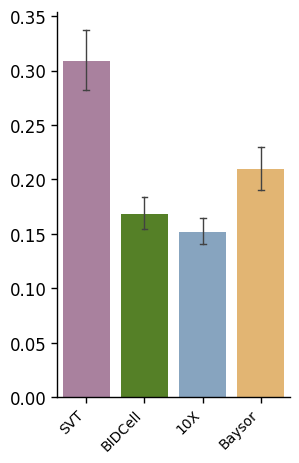

In [46]:
sensitivity_boxplot_data["Segmentation Method"] = pd.Categorical(
    sensitivity_boxplot_data["Segmentation Method"],
    categories=["SVT", "BIDCell", "10X", "Baysor"]
)

fig, ax = plt.subplots(1, 1, figsize=(3, 5))
plot_bar(sensitivity_boxplot_data, x_col="Segmentation Method", y_col='Sensitivity', hue="Segmentation Method", y_label='', ax=ax, method_colors=method_colors, error_bar=True)
# No x,y labels
ax.set_xlabel('')
ax.set_ylabel('')
# No x tick
# ax.set_xticks([])
# y ticks: 0, 0.2, 0.4, 0.6, 0.8
# ax.set_yticks(np.arange(0.4, 0.62, 0.05))
# Only 1 decimal place
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
ax.tick_params(axis='y', labelsize=12)

In [50]:
adata_sc.var.index

Index(['IL2RG', 'SNAI1', 'GLIPR1', 'OXTR', 'MYBPC1', 'MUC6', 'PDK4', 'KLRB1',
       'RUNX1', 'DSP',
       ...
       'CTH', 'CAV1', 'CD80', 'GATA3', 'ANKRD30A', 'BASP1', 'CD14', 'C5orf46',
       'IGF1', 'LEP'],
      dtype='object', length=307)

In [58]:
ad_st_dict = {
    "10X_tangram": annotated_10X_tangram.copy(),
    "10X_scvi": annotated_10X_scvi.copy(),
    "SVT": annotated_svt.copy()
}

# Varnames: Upper case
for method in ad_st_dict.keys():
    ad_st_dict[method].var.index = ad_st_dict[method].var.index.str.upper()

# Only varnames in the gene map are used
adata_sc = adata_sc[:, annotated_svt.var_names].copy()

adata_sc.var.index = adata_sc.var.index.str.upper()

all_avg_df = {}
for method in ad_st_dict.keys():
    avg_df = pd.DataFrame(index=np.unique(ad_st_dict[method].obs["celltype"]), columns=ad_st_dict[method].var.index)
    ad_temp= ad_st_dict[method].copy()
    # Normalize total
    sc.pp.normalize_total(ad_temp, target_sum=1e4)
    # Log1p
    sc.pp.log1p(ad_temp)
    for cell_type in np.unique(ad_temp.obs["celltype"]):
        ad = ad_temp[ad_temp.obs["celltype"] == cell_type]
        avg_df.loc[cell_type] = ad.X.mean(axis=0)
    all_avg_df[method] = avg_df

avg_sc = pd.DataFrame(index=np.unique(adata_sc.obs["celltype"]), columns = adata_sc.var.index)
ad_temp = adata_sc.copy()
# Scale
sc.pp.normalize_total(ad_temp, target_sum=1e4)
# Log1p
sc.pp.log1p(ad_temp)
for cell_type in np.unique(ad_temp.obs["celltype"]):
    ad = ad_temp[ad_temp.obs["celltype"] == cell_type]
    avg_sc.loc[cell_type] = ad.X.mean(axis=0)

# Same column order
for method in all_avg_df.keys():
    all_avg_df[method] = all_avg_df[method][avg_sc.columns]

# Pearson correlation for each method and each Celltype
from scipy.stats import pearsonr

all_corr_df = {}
for method in all_avg_df.keys():
    corr_df = pd.DataFrame(index=np.unique(adata_sc.obs["celltype"]), columns=all_avg_df[method].index)
    for cell_type in np.unique(adata_sc.obs["celltype"]):
        for method_cell_type in all_avg_df[method].index:
            corr_df.loc[cell_type, method_cell_type] = pearsonr(all_avg_df[method].loc[method_cell_type], avg_sc.loc[cell_type])[0]
    all_corr_df[method] = corr_df
    # Convert to float
    all_corr_df[method] = all_corr_df[method].astype(float)

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


In [59]:
celltype_corr_df = pd.DataFrame(index=list(all_corr_df.keys()), columns=np.unique(adata_sc.obs["celltype"]))
for cell_type in np.unique(adata_sc.obs["celltype"]):
    for method in all_corr_df.keys():
        celltype_corr_df.loc[method, cell_type] = all_corr_df[method].loc[cell_type, cell_type]

In [60]:
# Calculate the average pearson correlation for each method
corr_avg = {}
for method in all_corr_df.keys():
    temp = []
    for cell_type in all_corr_df[method].index:
        temp.append(all_corr_df[method].loc[cell_type, cell_type])
    corr_avg[method] = np.mean(temp)

In [67]:
color_dict = {
    "SVT": "#B07AA1",
    "10X_tangram": "#E2B573",
    "10X_scvi": "#88BFB1",
}
df = {
    "Method": ["SVT", "10X_tangram", "10X_scvi"],
    "Value": [corr_avg["SVT"], corr_avg["10X_tangram"], corr_avg["10X_scvi"]]
}

fig, ax = plt.subplots(1, 1, figsize=(4, 5))
plot_bar(df, x_col="Method", y_col='Value', hue="Method", y_label='', ax=ax, method_colors=color_dict, error_bar=False)
# No x,y labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_ylim(0.7, 0.85)
# No x tick
ax.set_xticks([])
# y ticks: 0, 0.2, 0.4, 0.6, 0.8
# ax.set_yticks(np.arange(0.4, 0.62, 0.05))
# Only 1 decimal place
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
ax.tick_params(axis='y', labelsize=15)

/tmp/ipykernel_993120/2228022090.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


### Spatial gene

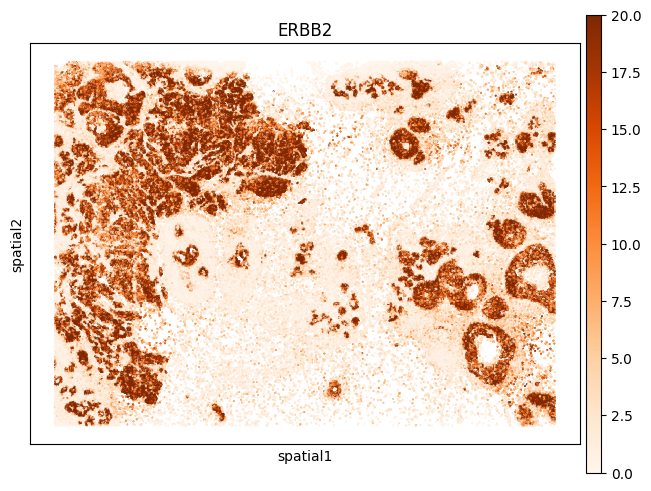

In [71]:
# Spatial gene
import squidpy as sq

annotated_svt.obsm["spatial"] = np.array(annotated_svt.obs[['center_y', 'center_x']])
sq.gr.spatial_neighbors(annotated_svt)
sq.gr.spatial_autocorr(annotated_svt, mode="moran")
sq.pl.spatial_scatter(
    annotated_svt,
    shape=None,
    color=["ERBB2"],
    size=0.5,
    cmap = "Oranges",
    vmax = 20,
    dpi=100
)

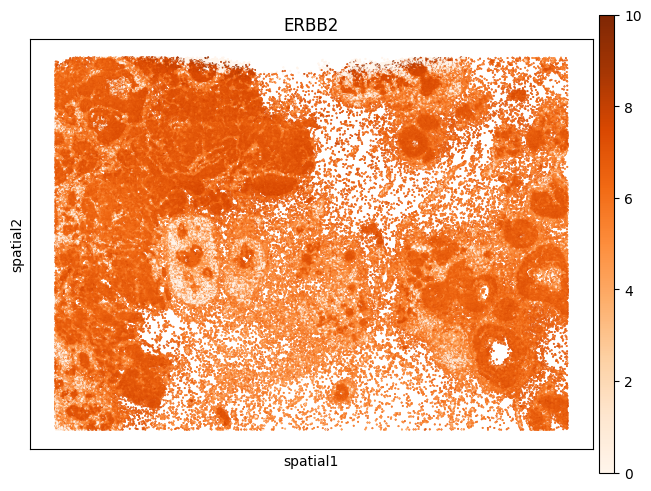

In [72]:
annotated_10X_scvi.X = annotated_10X_scvi.layers["counts"]
annotated_10X_scvi.obsm["spatial"] = np.array(annotated_10X_scvi.obs[['center_y', 'center_x']])
sq.gr.spatial_neighbors(annotated_10X_scvi)
sq.gr.spatial_autocorr(annotated_10X_scvi, mode="moran")
sq.pl.spatial_scatter(
    annotated_10X_scvi,
    shape=None,
    color=["ERBB2"],
    size=0.5,
    cmap = "Oranges",
    vmax = 10,
    dpi=100
)

### Velocity

In [74]:
annotated_svt_subtype = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/XeniumBreastCancerFullOldModelLong/epoch_120/cell_deconv.h5ad")
svt_mask_subtype = np.load("/import/home2/yhchenmath/Code/Triplet/LOG/XeniumBreastCancerFullOldModelLong/new_segmentation_mask.npy").astype("int32")
svt_nuclei = np.load("/import/home2/yhchenmath/Code/SVT/data/XeniumBreastCancerFullExample/segmentation_mask.npy") # U

append_xenium_boundary(svt_mask_subtype, sdata, "svt_boundary_subtype", celltype = annotated_svt_subtype.obs["celltype"])
append_xenium_boundary(svt_nuclei, sdata, "svt_nuclei_boundary")

/tmp/ipykernel_993120/2510591147.py:92: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_df = sdata.shapes[append_name].centroid


In [75]:
seg_transformation = sd.transformations.get_transformation(sdata.shapes["nucleus_boundaries"])
translation = sd.transformations.Translation([6, 6.5], axes=("x", "y"))
sequence = sd.transformations.Sequence([translation, seg_transformation])
sd.transformations.set_transformation(sdata.shapes["svt_boundary_subtype"], sequence, to_coordinate_system="global")
sd.transformations.set_transformation(sdata.shapes["svt_nuclei_boundary"], sequence, to_coordinate_system="global")

In [76]:
x_min, x_max, y_min, y_max = 15600, 15950, 32325, 32675
sdata_roi_2 = sdata.query.bounding_box(
    min_coordinate=[x_min, y_min], max_coordinate=[x_max, y_max], axes=("y", "x"), target_coordinate_system="global"
)

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [78]:
k = 'svt_boundary_subtype'
# sdata_roi_2.shapes[k].celltype = sdata_roi_2.shapes[k].celltype.map(mapping)
# Drop nan
sdata_roi_2.shapes[k].dropna(subset=["celltype"], inplace=True)
ct_col = sdata_roi_2.shapes[k].celltype
cts = sdata_roi_2.shapes[k].celltype.unique()
for ct in cts:
    sdata_roi_2.shapes[f"{k}_{ct.replace(' ', '_').replace('(', '').replace(')', '')}"] = \
    sdata_roi_2.shapes[k][ct_col == ct]

/tmp/ipykernel_993120/3690699911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata_roi_2.shapes[k].dropna(subset=["celltype"], inplace=True)


In [79]:
# Plot svt
celltype_mapping = {
    "Unassigned": '#D3D3D3',
    'Invasive Tumor': '#E477C1',
    'Prolif Invasive Tumor': '#289E68',
    'DCIS 2': '#FF7F0D',
    'DCIS 1': '#AA41FC',
}


def plot_annotation(sdata, shape_key, ax, title):
    tmp = sdata.pl.render_images("he_image")
    draw_cts = sdata.shapes[shape_key].celltype.unique().tolist()
    for ct in draw_cts:
        color = celltype_mapping[ct]
        tmp = tmp.pl.render_shapes(
            f"{shape_key}_{ct.replace(' ', '_').replace('(', '').replace(')', '')}",
            color=color, fill_alpha=0.45, outline_width=3, outline_alpha=1, outline_color = color
        )
    tmp = tmp.pl.render_shapes(
            f"svt_nuclei_boundary",
            color="w", fill_alpha=0.0, outline_width=3, outline_alpha=1, outline_color = "w"
        )
    tmp.pl.show(coordinate_systems="global", ax=ax, title="", frameon=False, legend_loc='none')
    ax.axis('off')

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(15600.0, 15950.0)

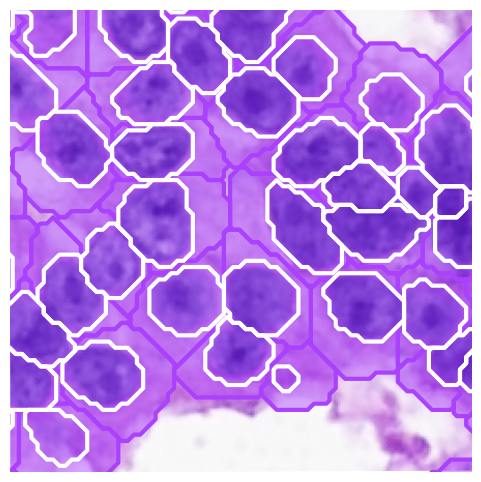

In [80]:
# plt.style.use('default')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6,6))

plot_annotation(sdata_roi_2, k, ax, "")


ax.set_xlim(y_min, y_max)
ax.set_ylim(x_min, x_max)

# plt.tight_layout()

In [ ]:
import geopandas as gpd
gdf_cell = sdata.shapes["svt_boundary_subtype"]
gdf_cell["x"] = sdata.points["svt_boundary_subtype_centroid"].compute()['x'].values
gdf_cell["y"] = sdata.points["svt_boundary_subtype_centroid"].compute()['y'].values
gdf_nuclei = sdata.shapes["svt_nuclei_boundary"]
common_ids = gdf_cell.index.intersection(gdf_nuclei.index)
cells_common = gdf_cell.loc[common_ids]
nuclei_common = gdf_nuclei.loc[common_ids]
cytoplasm_geometry = cells_common.geometry.difference(nuclei_common.geometry)

In [ ]:
# As a geodataframe
gdf_cyto = gpd.GeoDataFrame({
    'cell_id': cells_common.index,
    'geometry': cytoplasm_geometry
})
gdf_cyto = gdf_cyto.set_index("cell_id")

In [ ]:
from spatialdata.models import ShapesModel

sdata["cyto"] = ShapesModel.parse(gdf_cyto)
# Set transformation
sd.transformations.set_transformation(sdata.shapes["cyto"], sequence, to_coordinate_system="global")

sdata["nuclei_common"] = ShapesModel.parse(nuclei_common)
sd.transformations.set_transformation(sdata.shapes["nuclei_common"], sequence, to_coordinate_system="global")

In [ ]:
import sopa

adata_nuclei = sopa.aggregation.count_transcripts(sdata, points_key='transcripts', shapes_key="nuclei_common")
adata_cyto = sopa.aggregation.count_transcripts(sdata, points_key='transcripts', shapes_key="cyto")

# adata_nuclei.write_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/XeniumBreastCancer_Annotation_with_feature/nuclei.h5ad")

adata_cyto.obs["celltype"] = cells_common.celltype.values
adata_cyto.obs["x"] = cells_common.x.values
adata_cyto.obs["y"] = cells_common.y.values

# # Save
# adata_cyto.write_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/XeniumBreastCancer_Annotation_with_feature/cyto.h5ad")

# import scanpy as sc

# adata_cyto = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/XeniumBreastCancer_Annotation_with_feature/cyto.h5ad")
# adata_nuclei = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/XeniumBreastCancer_Annotation_with_feature/nuclei.h5ad")

In [82]:
# Plot svt
celltype_mapping = {
    "Unassigned": '#D3D3D3',
    'Invasive Tumor': '#E477C1',
    'Prolif Invasive Tumor': '#289E68',
    'DCIS 2': '#FF7F0D',
    'DCIS 1': '#AA41FC',

}

In [85]:
adata = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/XeniumBreastCancerFullOldModelLong/epoch_120/cell_deconv.h5ad")
# adata = adata[adata.obs["celltype"].isin(["DCIS 1", "DCIS 2", "Invasive Tumor", "Prolif Invasive Tumor"]), :].copy()
mapping = {
    "Invasive Tumor": "Invasive Tumor",
    "Prolif Invasive Tumor": "Prolif Invasive Tumor",
    "DCIS 2": "DCIS 2",
    "DCIS 1": "DCIS 1",
}
for celltype in adata.obs["celltype"].unique():
    if celltype not in mapping:
        mapping[celltype]="Unassigned"
adata.obs["celltype"] = adata.obs["celltype"].map(mapping)
# Filtered 
sc.pp.filter_cells(adata, min_counts=10)

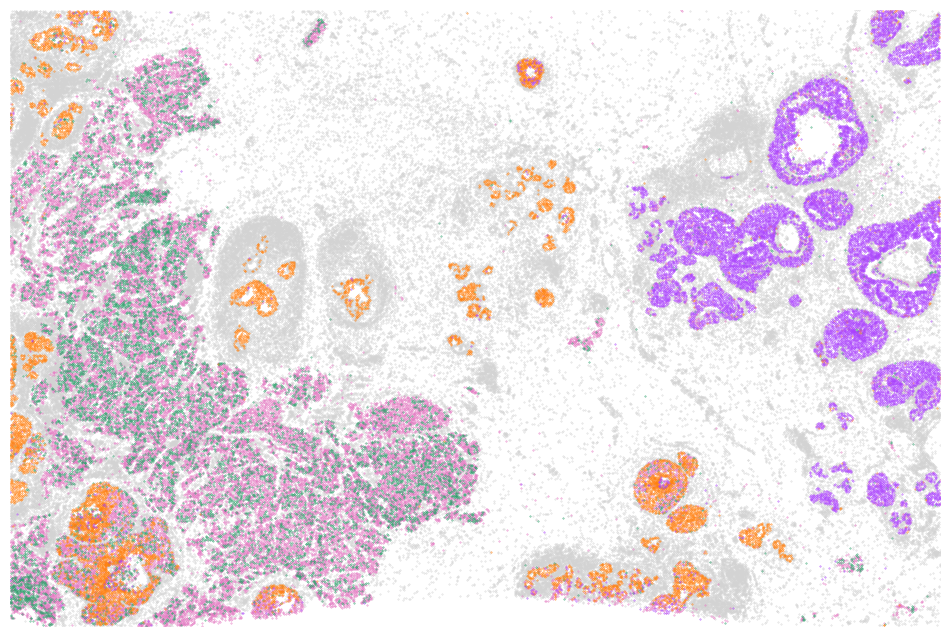

In [89]:
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

df = adata.obs

fig, ax1 = plt.subplots(1, 1, figsize=(12,8))

from matplotlib.patches import Rectangle



celltype_names = list(celltype_mapping.keys())
# selected_celltype = ["Tumor II", "Tumor III", "Tumor V"]
selected_celltype = celltype_names
for i in range(len(celltype_names)):
    # (0,0) is on the top left corner
    if celltype_names[i] not in selected_celltype:
        continue
    sub_df = df[df["celltype"] == celltype_names[i]]
    ax1.scatter(sub_df["y"], sub_df["x"], s=0.1, label=celltype_names[i], color=celltype_mapping[celltype_names[i]])
# ax1.invert_yaxis()
ax1.axis("off")
ax1.set_xlim(df["y"].min(), df["y"].max())
ax1.set_ylim(df["x"].max(), df["x"].min())
ax1.invert_yaxis()

plt.show()

Filtered out 29 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Logarithmized X.


/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_993120/2708178238.py:15: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata)
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(


computing neighbors


2025-11-20 16:27:50.958894: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-20 16:27:53.986058: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


    finished (0:01:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/44 cores)


  0%|          | 0/35068 [00:00<?, ?cells/s]

    finished (0:00:58) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


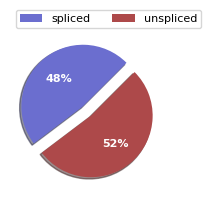

In [91]:
adata_cyto = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/XeniumBreastCancer_Annotation_with_feature/cyto.h5ad")
adata = adata_cyto.copy()
adata.layers["unspliced"] = adata_nuclei.X
adata.layers["spliced"] = adata_cyto.X
# Filtered cells umi < 50
sc.pp.filter_cells(adata, min_counts=100)

adata = adata[adata.obs["celltype"].isin(["DCIS 1", "DCIS 2", "Invasive Tumor", "Prolif Invasive Tumor"]), :].copy()

import scvelo as scv

scv.pp.filter_and_normalize(adata, min_shared_counts=20)
# Remove duplicated cell
scv.pp.remove_duplicate_cells(adata)
scv.pp.moments(adata)

scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata)
scv.pl.proportions(adata)

# UMAP
sc.pp.neighbors(adata, use_rep="X_pca")
sc.tl.umap(adata)

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


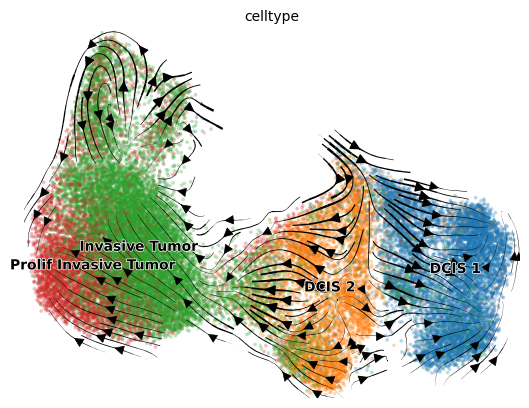

In [93]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color='celltype', dpi=100, arrow_size=1.5, legend_fontsize=10)